In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
def plot_from_csv(file_name, x_column_name, sample_rate):
    """
    Imports two columns from a CSV file and displays the FFT spectrum of the x column up to the Nyquist frequency.

    Parameters:
        file_name (str): Path to the CSV file.
        x_column_name (str): The name of the x-column in the CSV.
        sample_rate (float): Sampling rate of the data in Hz.
    """
    # Import the CSV file using pandas
    data = pd.read_csv(file_name)

    # find total ramp time from file name 
    match = re.search(r'_(\d+)s', file_name)
    ramp_time = match.group(1)

    # Extract the x column
    x = data[x_column_name]

    # Number of samples
    t_stamp = np.arange(0,ramp_time, len(x))

    # Plot the FFT spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(t_stamp,x)
    plt.title(f"ramp of {x_column_name}")
    plt.xlabel("time")
    plt.ylabel("voltage")
    plt.grid(True)
    plt.show()


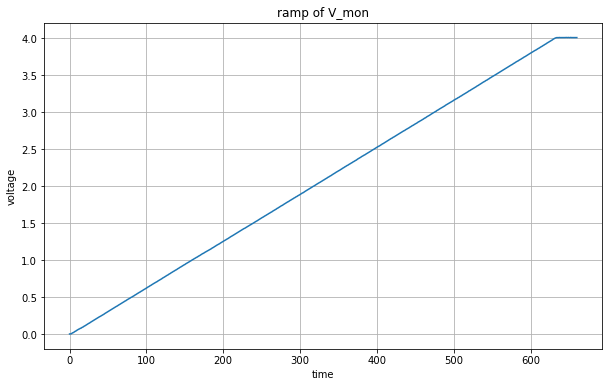

In [6]:
file_name = 'ramp_and_record_0.000V_to_4.000V_step_0.01V_in_60s_2025-02-25_16-25-30_DAQ.csv'
plot_from_csv(file_name, 'V_mon', sample_rate=1000)  # Assuming sample rate of 1000 Hz